# Red Wine Quality Prediction Project

**Project Description**

*The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).*

*This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.*

**Attribute Information**

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)


*What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.*


You need to build a classification model. 

**Inspiration**

*Use machine learning to determine which physiochemical properties make a wine 'good'!*

**Dataset Link-**

https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Red%20Wine/winequality-red.csv

# Answer:-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

# Exploratory Data Analysis(EDA)

In [7]:
#Checking the Dimention of the dataset
df.shape

(1599, 12)

In [9]:
#Checking the columns of the Dataset
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [10]:
#Checking the datatypes  for each columns of the DataFrame df
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**Observation:-** There are 11 columns contains float datatype  and one column contains int datatype.

**Observation 2:-** Here all columns have numerical data so I dont have to apply any encoding techniques.

In [13]:
#Checking for the nun values 
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
#Checking overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Ovservation:-** We can see df is a DataFrame (class 'pandas.core.frame.DataFrame').dtypes: 11 float columns, 1 int column.Memory usage: 150.0 KB

<Axes: >

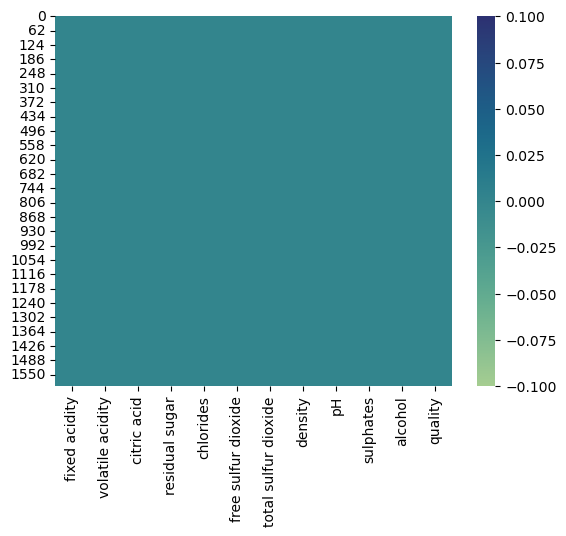

In [16]:
#Visualize null value using heatmap
sns.heatmap(df.isnull(),cmap="crest")

In [18]:
#Checking unique values for each column of the dataset
for i in df.columns:
    print("Unique value counts of",i,"is:-",df[i].nunique())
    

Unique value counts of fixed acidity is:- 96
Unique value counts of volatile acidity is:- 143
Unique value counts of citric acid is:- 80
Unique value counts of residual sugar is:- 91
Unique value counts of chlorides is:- 153
Unique value counts of free sulfur dioxide is:- 60
Unique value counts of total sulfur dioxide is:- 144
Unique value counts of density is:- 436
Unique value counts of pH is:- 89
Unique value counts of sulphates is:- 96
Unique value counts of alcohol is:- 65
Unique value counts of quality is:- 6


**Or to check unique values we can also use the techinque below:-**

In [21]:
df.nunique().to_frame("Count of unique values")

Count of unique values
fixed acidity                             96
volatile acidity                         143
citric acid                               80
residual sugar                            91
chlorides                                153
free sulfur dioxide                       60
total sulfur dioxide                     144
density                                  436
pH                                        89
sulphates                                 96
alcohol                                   65
quality                                    6

**Ovservation:-** We have to predict the wine quality so basis on that "quality" column is our target variable and it has 1599 data but if you check it's unique values that is only 6,so **the difference between the count of data it has and it's unique values counts is too high**.**So we can considers it's a Classification problem.** 

In [19]:
#Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

# Description of data

In [23]:
#Statistical summary of our dataset
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

**Observation:-**
    
*1) The summary of the dataset looks perfect because there is no negative and null values are  present in the dataset.*
    
*2) Apart from "quality" column all column has greater mean than median(50%) that means all the columns has right skewed data only "quality" column has left skewed data.*
    
*3) By observing the data we can see a huge difference between 75% and max that means outliers are present.*
    

# Data Visialization:-

**Univariate annalysis**

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


<Axes: xlabel='quality', ylabel='count'>

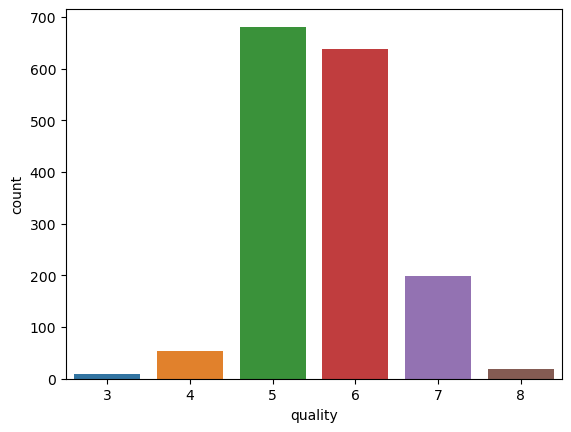

In [28]:
print(df["quality"].value_counts())
sns.countplot(x="quality",data=df)

**Here we can see in the "qualite" column 5 and 6 rattings has higher counts than other quality rattings so that is a clear indication class imbalance issue.** 

**I will solve the class imbalance issue by using the over sampling method like SMOTE in the later part**

**Bivariate Analysis**

<Axes: xlabel='fixed acidity', ylabel='citric acid'>

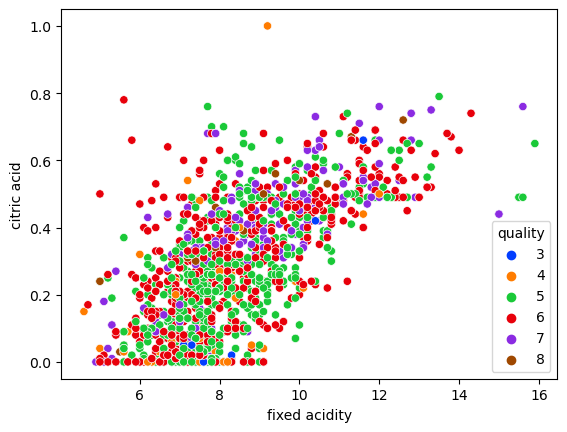

In [39]:
sns.scatterplot(x="fixed acidity",y="citric acid",hue="quality",data=df,palette="bright")

Here you can see if citric acid increases fixed acidity is also increases so we can say citric acid and fixed acidity has positive correlation and when these two are increases the wine quality is also increases.**I can see where citric acid and fixed acidity is hign in value the rattings of the wines are mostly 6 and 7.**

<Axes: xlabel='pH', ylabel='fixed acidity'>

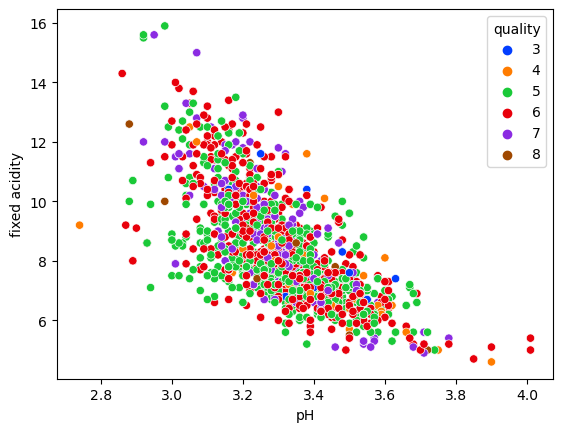

In [41]:
sns.scatterplot(x="pH",y="fixed acidity",hue="quality",data=df,palette="bright")

**Here "pH" and "fixed acidity" negatively correlated.**

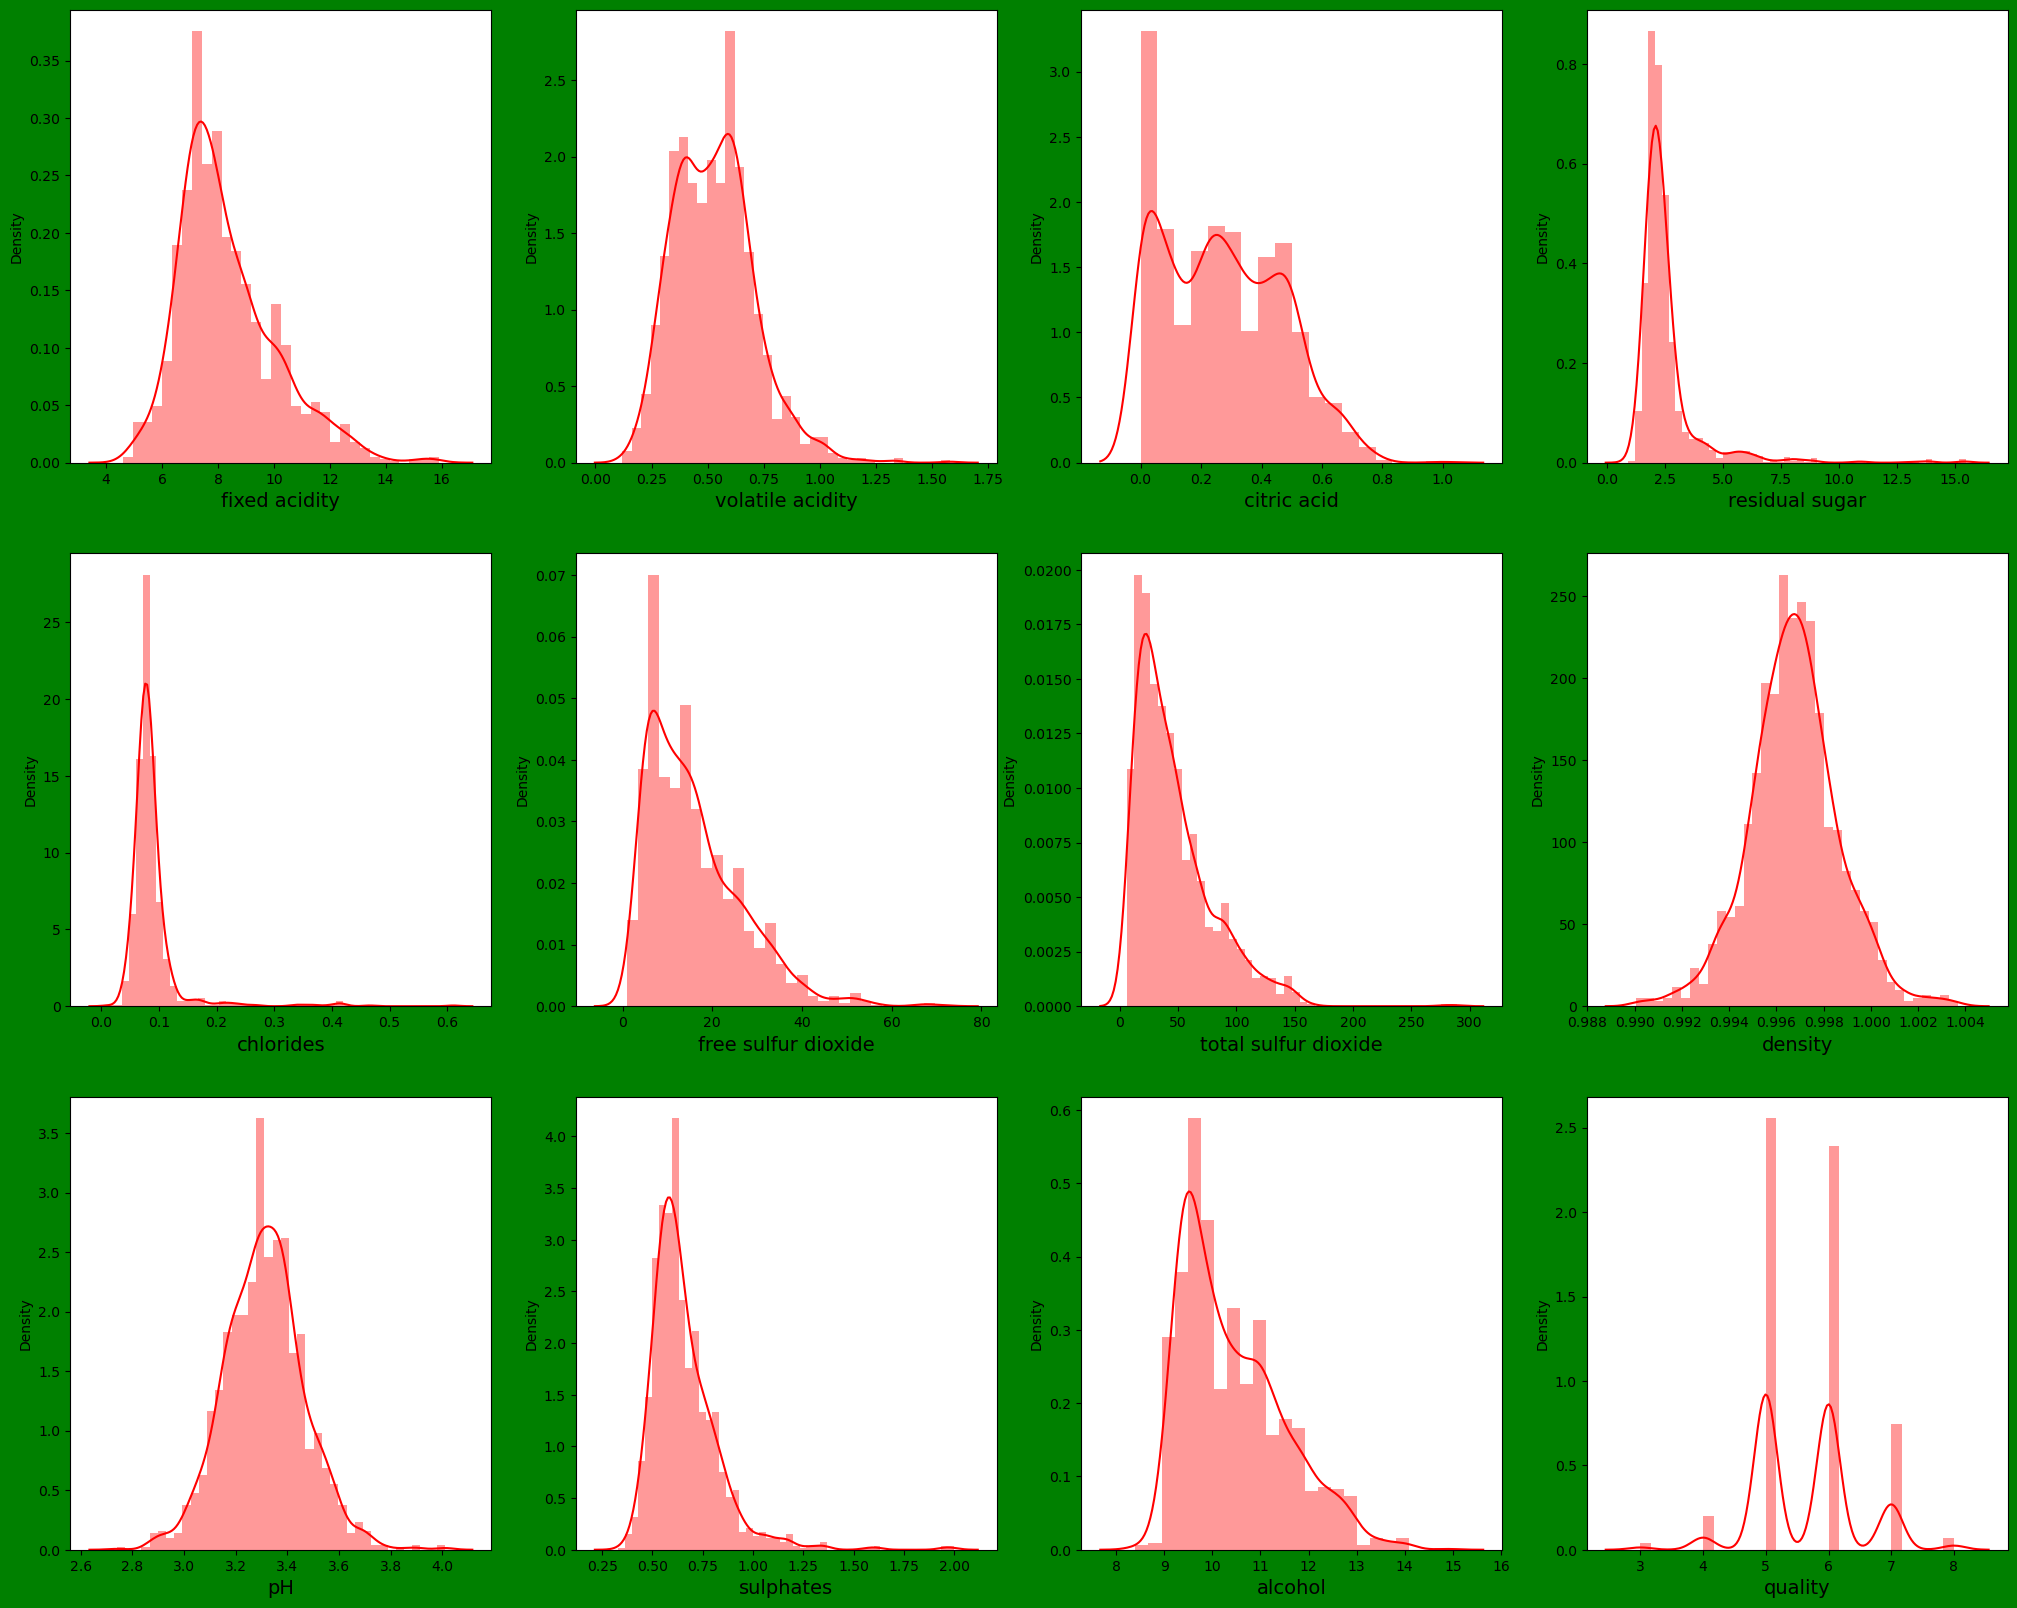

In [44]:
#Visualizing data distribution for all columns
plt.figure(figsize=(25,20),facecolor="g")
plot=1

for i in df.columns:
    if plot<14:
        plt.subplot(3,4,plot)
        sns.distplot(df[i],color="r")
        plt.xlabel(i,fontsize=14)
        plt.yticks(rotation=0)
        
    plot+=1
plt.show()


**Here most of the columns are normaly diistributed but some columns like "free sulfur dioxide","total sulfur dioxide" and "alcohol" has little bit right tail skewness.**

**Multivariate Analysis**

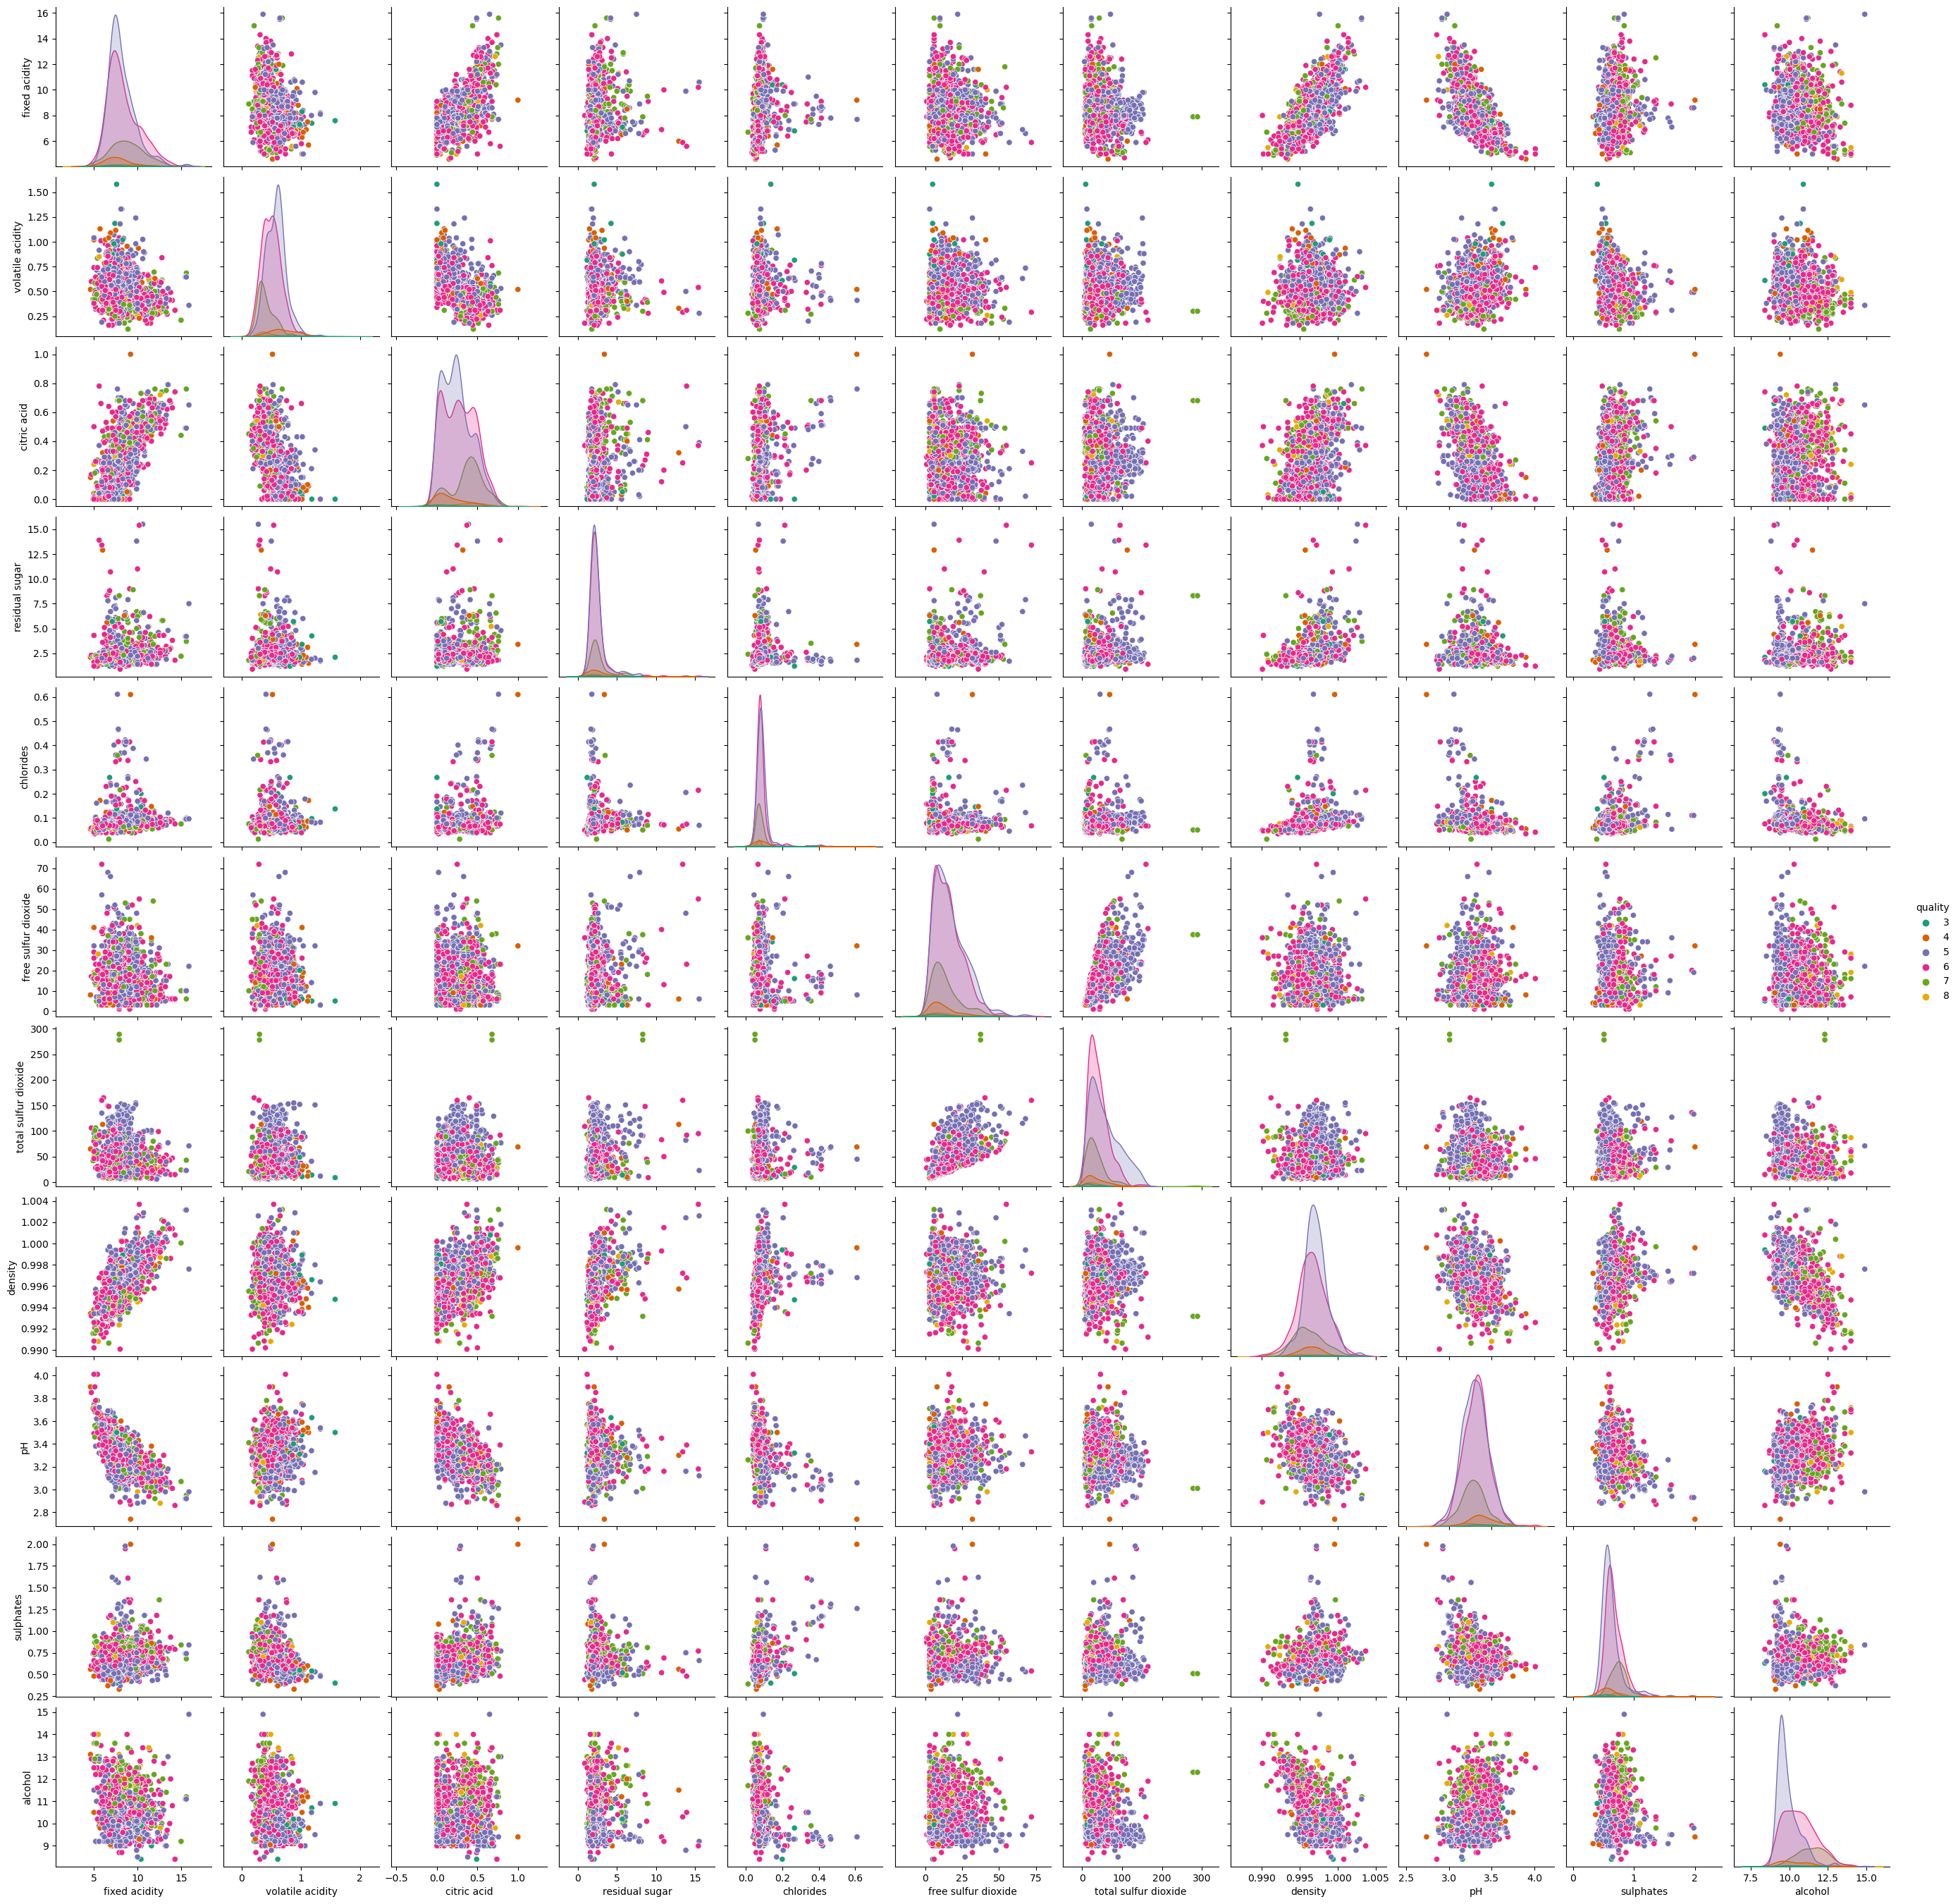

In [46]:
sns.pairplot(df,hue="quality",palette="Dark2")

# Checking for outlires using boxplot

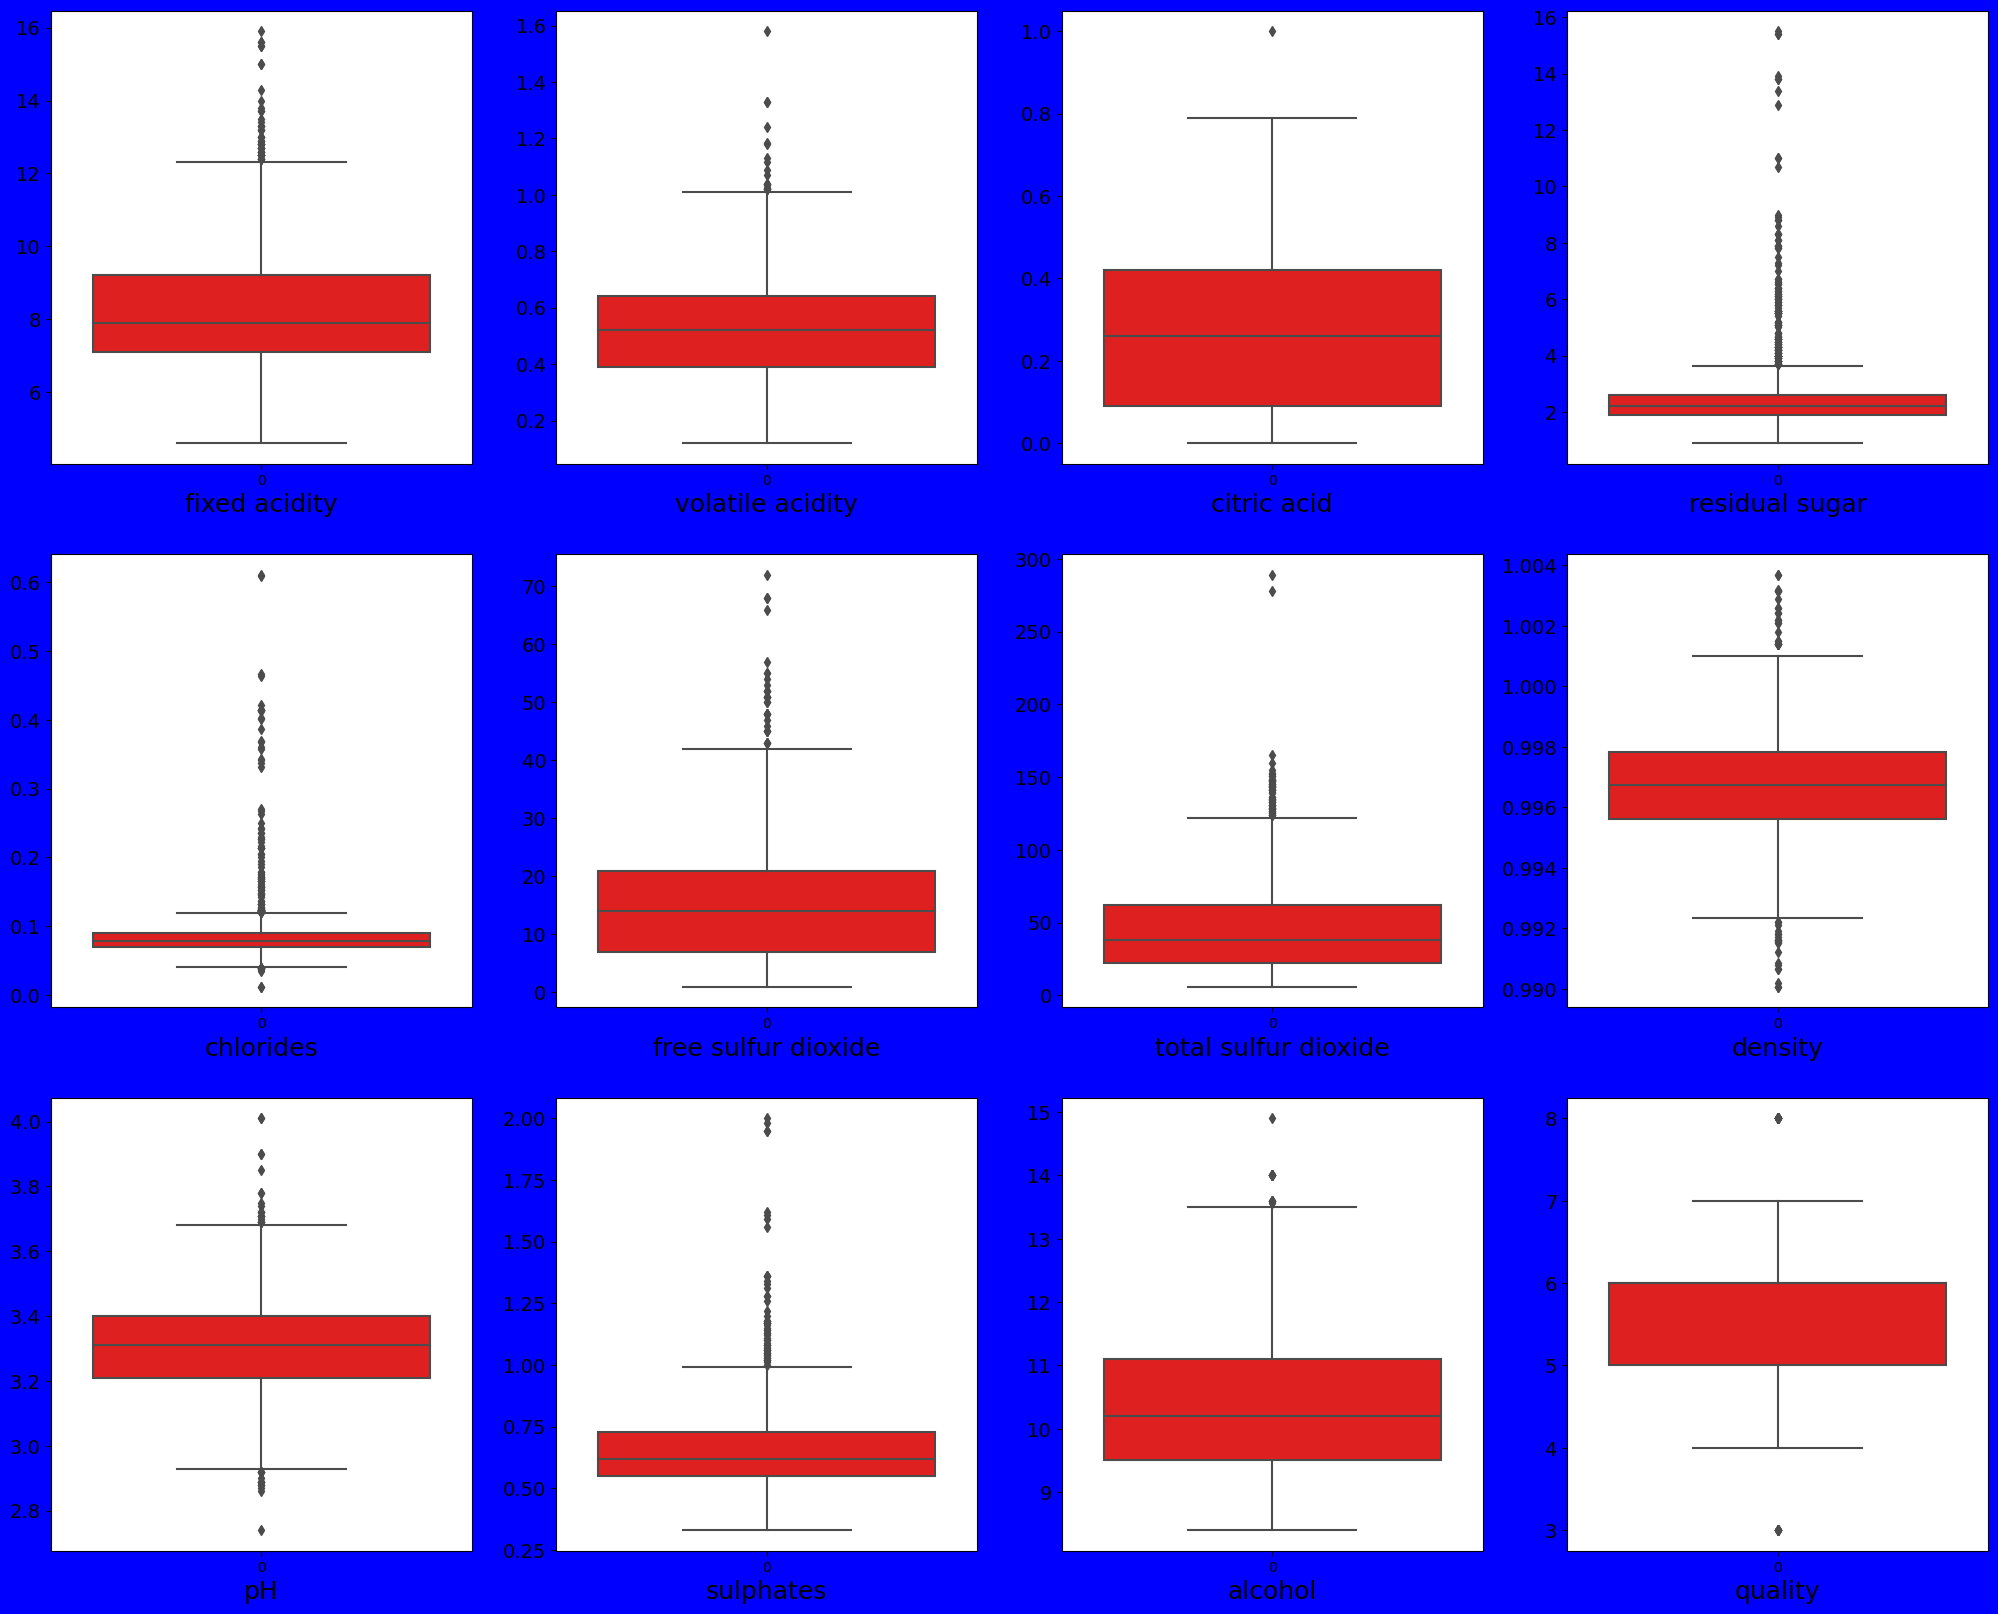

In [49]:
plt.figure(figsize=(25,20),facecolor="b")
plot=1
for col in df.columns:
    if plot<15:
        plt.subplot(3,4,plot)
        sns.boxplot(df[col],color="r")
        plt.xlabel(col,fontsize=18)
        plt.yticks(rotation=0,fontsize=14)
    plot+=1
    
plt.show()

**Here you can see most of the colmns have the outliers.**

# Removing outliers

**Using zscore**

In [50]:
from scipy.stats import zscore
out_features=df[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
z=np.abs(zscore(out_features))
z

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.466193              0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261  0.719933   
2                0.083669              0.229047  0.134264  0.331177   
3                0.107592              0.411500  0.664277  0.979104   
4                0.466193              0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054              0.075043  0.978765  0.899886   
1595             2.211469              0.137820  0.862162  1.353436   
1596             1.255161              0.196679  0.533554  0.705508   
1597             1.542054              0.075043  0.676657  1.677400   
1598             0.203223              0.135861  0.666057  0.511130   

      sulphates   alcohol  
0      0.579207  0.960246  
1      0.128950  0.584777  
2      0.048089  0.584777  
3      0.461180  0.584777  
4      0.579207  0.960246  
...         ...       ...  
1594   0.461180  0.072294  
1595   0.601055  0.729364  
1596   0.542042  0.541630  
1597   0.305990  0.209308  
1598   0.010924  0.541630  

[1599 rows x 11 columns]

**Important:-** *Here I dont add "quality" column to check outliers because it's my Target variable also it's a categorical column and we ignores the outliers on categorical columns.*

# Finding outliers location

In [52]:
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [53]:
#Checking outliers using it's location
z.iloc[13,9]

5.32210116796055

**You can the the value of 13 no.row and 9 no. column is 5.32.... that is more than 3 that means it's a outlier.**

In [54]:
#Removing outliers
new_df=df[(z<3).all(axis=1)]
new_df.shape

(1458, 12)

In [58]:
#Checking old Dataframe counts with new outliers free Dataframe
print("Old Dataframe:-",df.shape[0])
print("New Dataframe:-",new_df.shape[0])
print("The counts of rows we lost due to outliers are:-",df.shape[0]-new_df.shape[0])

Old Dataframe:- 1599
New Dataframe:- 1458
The counts of rows we lost due to outliers are:- 141


**141 rows we lost due to outliers**

In [60]:
#Checking the datalost percentage after removing outliers using zscore method
print("Data  lost percentage after removing outliers using zscore method",((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Data  lost percentage after removing outliers using zscore method 8.818011257035648


**Using IQR**

In [62]:
#1st quantile
Q1=out_features.quantile(0.25)

In [64]:
#3rd quantile
Q3=out_features.quantile(0.75)

In [65]:
#IQR
IQR=Q3-Q1

In [66]:
new_df_2=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)).any(axis=1))]
new_df_2.shape

(1599, 12)

In [68]:
#Checking new and old dataframe shape
print("Old Dataframe:-",df.shape[0])
print("New Dataframe:-",new_df_2.shape[0])

Old Dataframe:- 1599
New Dataframe:- 1599


**So you can clearly see IQR method did not find any outliers in this dataset so we will stick to our "new_df" dataset ,that's the outlier free dataset using zscore.**

# Checking for skewness

In [70]:
new_df.skew().to_frame("Skewness value")

Skewness value
fixed acidity               0.820879
volatile acidity            0.392097
citric acid                 0.292600
residual sugar              2.450707
chlorides                   2.307274
free sulfur dioxide         0.869727
total sulfur dioxide        1.185230
density                     0.055543
pH                          0.113039
sulphates                   0.893297
alcohol                     0.757396
quality                     0.248823

**Default acceptable range for skewness is -0.5 to +0.5** and you can clearly see most of the columns are above that range so we have to remove their skewness.

# Removing skewness using cube root method

In [71]:
#Removing "fixed acidity" columns skewness
new_df["fixed acidity"]=np.cbrt(new_df["fixed acidity"])

In [73]:
#Removing skewness for all columns those skewness values are out of the range of -0.5 to +0.5
new_df["residual sugar"]=np.cbrt(new_df["residual sugar"])
new_df["chlorides"]=np.cbrt(new_df["chlorides"])
new_df["free sulfur dioxide"]=np.cbrt(new_df["free sulfur dioxide"])
new_df["total sulfur dioxide"]=np.cbrt(new_df["total sulfur dioxide"])
new_df["sulphates"]=np.cbrt(new_df["sulphates"])
new_df["alcohol"]=np.cbrt(new_df["alcohol"])

In [74]:
#Checking the skewness again
new_df.skew().to_frame("Skewness value")

Skewness value
fixed acidity               0.527560
volatile acidity            0.392097
citric acid                 0.292600
residual sugar              1.629756
chlorides                   1.056128
free sulfur dioxide         0.127793
total sulfur dioxide        0.343010
density                     0.055543
pH                          0.113039
sulphates                   0.526494
alcohol                     0.643830
quality                     0.248823

*So we can see all columns skewness are reduced **but still some of the columns like "residual sugar","chlorides" and "alcohol" has the skewness values that's still not in the range of exceptable skewness**.*

**So I will use log norm distribution to these three columns to reduce their skewness.Let see:**

In [75]:
#Appling log norm distribution to "residual sugar","chlorides" and "alcohol" columns
new_df["residual sugar"]=np.log(new_df["residual sugar"])
new_df["chlorides"]=np.log(new_df["chlorides"])
new_df["alcohol"]=np.log(new_df["alcohol"])

In [76]:
#Checking the skewness again
new_df.skew().to_frame("Skewness value")

Skewness value
fixed acidity               0.527560
volatile acidity            0.392097
citric acid                 0.292600
residual sugar              1.229070
chlorides                   0.528828
free sulfur dioxide         0.127793
total sulfur dioxide        0.343010
density                     0.055543
pH                          0.113039
sulphates                   0.526494
alcohol                     0.588835
quality                     0.248823

**Now you can see after appling log norm distribution also "residual sugar" column's skewness value is still not in the range of -0.5 to +0.5.** 

**So I will try boxcox method on "residual sugar" to remove it's skewness.Let see:**

In [77]:
from scipy.stats import boxcox
#0 - Log transform
#.5 -> square root transform
new_df['residual sugar']=boxcox (new_df['residual sugar'],0)

In [78]:
#Checking the skewness again
new_df.skew().to_frame("Skewness value")

Skewness value
fixed acidity               0.527560
volatile acidity            0.392097
citric acid                 0.292600
residual sugar             -0.206392
chlorides                   0.528828
free sulfur dioxide         0.127793
total sulfur dioxide        0.343010
density                     0.055543
pH                          0.113039
sulphates                   0.526494
alcohol                     0.588835
quality                     0.248823

**So now all columns skewness values are in the range of +0.5 to -0.5.**

# Correlation between Target variable and Independent variables

In [79]:
new_df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.296687     0.696169   
volatile acidity          -0.296687          1.000000    -0.589286   
citric acid                0.696169         -0.589286     1.000000   
residual sugar             0.209296          0.038000     0.183292   
chlorides                  0.226423          0.079752     0.104443   
free sulfur dioxide       -0.165764          0.032589    -0.097483   
total sulfur dioxide      -0.098864          0.102031    -0.015382   
density                    0.663596         -0.000446     0.372338   
pH                        -0.716596          0.252900    -0.521270   
sulphates                  0.195504         -0.355067     0.307518   
alcohol                   -0.030753         -0.212932     0.163495   
quality                    0.132214         -0.362783     0.238244   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.209296   0.226423            -0.165764   
volatile acidity            0.038000   0.079752             0.032589   
citric acid                 0.183292   0.104443            -0.097483   
residual sugar              1.000000   0.209815             0.033885   
chlorides                   0.209815   1.000000            -0.030020   
free sulfur dioxide         0.033885  -0.030020             1.000000   
total sulfur dioxide        0.133511   0.078208             0.751304   
density                     0.394803   0.393204            -0.041366   
pH                         -0.067161  -0.202248             0.126631   
sulphates                   0.061195   0.000679             0.050594   
alcohol                     0.146979  -0.259783            -0.086571   
quality                     0.044418  -0.146522            -0.064810   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.098864  0.663596 -0.716596   0.195504   
volatile acidity                  0.102031 -0.000446  0.252900  -0.355067   
citric acid                      -0.015382  0.372338 -0.521270   0.307518   
residual sugar                    0.133511  0.394803 -0.067161   0.061195   
chlorides                         0.078208  0.393204 -0.202248   0.000679   
free sulfur dioxide               0.751304 -0.041366  0.126631   0.050594   
total sulfur dioxide              1.000000  0.132889  0.020039  -0.011570   
density                           0.132889  1.000000 -0.311217   0.131361   
pH                                0.020039 -0.311217  1.000000  -0.030247   
sulphates                        -0.011570  0.131361 -0.030247   1.000000   
alcohol                          -0.268901 -0.465070  0.137757   0.251586   
quality                          -0.205050 -0.177758 -0.084922   0.390975   

                       alcohol   quality  
fixed acidity        -0.030753  0.132214  
volatile acidity     -0.212932 -0.362783  
citric acid           0.163495  0.238244  
residual sugar        0.146979  0.044418  
chlorides            -0.259783 -0.146522  
free sulfur dioxide  -0.086571 -0.064810  
total sulfur dioxide -0.268901 -0.205050  
density              -0.465070 -0.177758  
pH                    0.137757 -0.084922  
sulphates             0.251586  0.390975  
alcohol               1.000000  0.497173  
quality               0.497173  1.000000

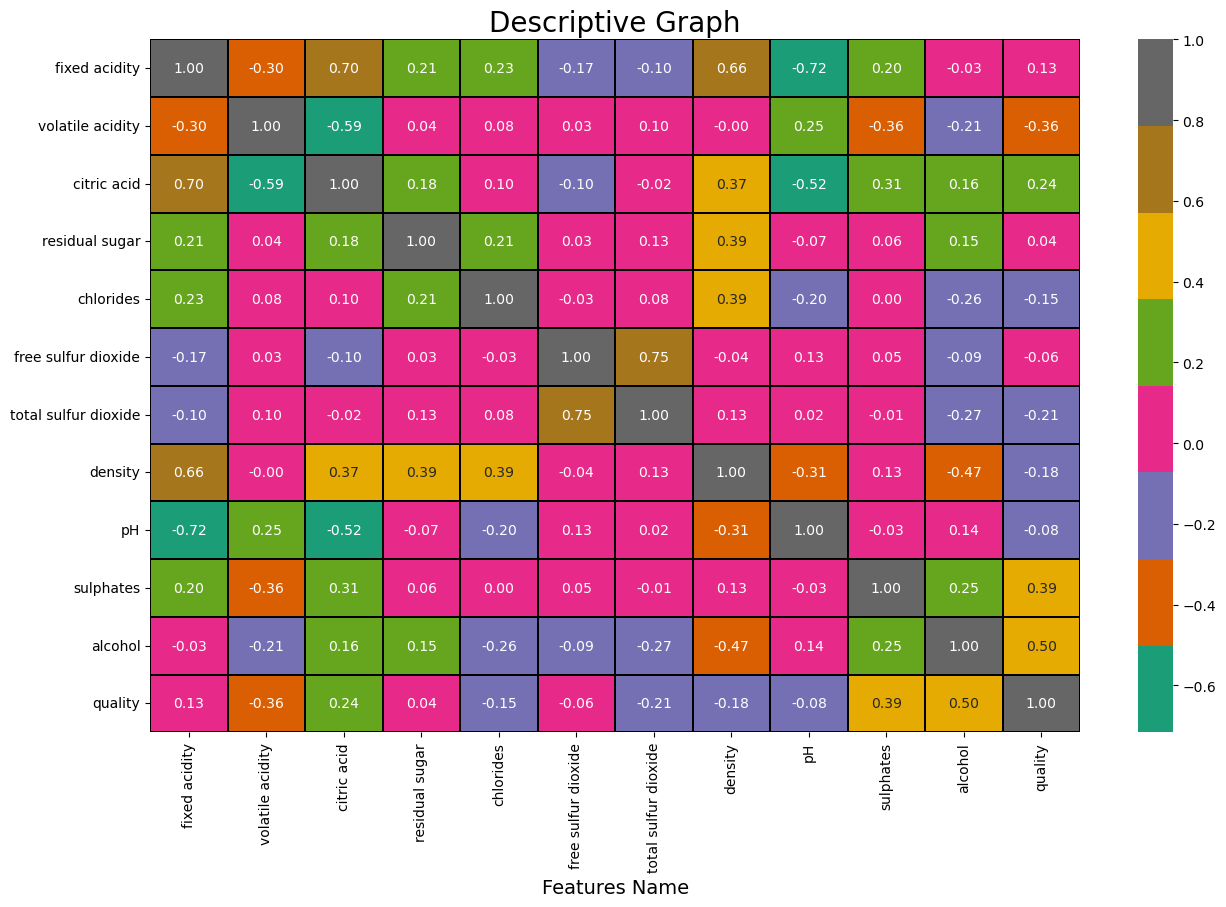

In [80]:
#Visualizing Correlation between Target variable and Independent variables using heatmap
plt.figure(figsize=(15,9))
sns.heatmap(new_df.corr(),cmap="Dark2",fmt="0.2f",linewidth="0.2",linecolor="black",annot=True)
plt.xlabel("Features Name",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

**Observation:-**
    
*1) Here you can see "volatile acidity","chlorides","total sulfur dioxide","density","pH" has negatively correlated with our Target variable and rest of the column are more or less positively correlated with our target variable.*

**2) "fixed acidity" and "Ph" has very negative correlated with each other.**

In [82]:
#Checking each colums correlation towards our Target variable
new_df.corr().quality.sort_values(ascending=True)

volatile acidity       -0.362783
total sulfur dioxide   -0.205050
density                -0.177758
chlorides              -0.146522
pH                     -0.084922
free sulfur dioxide    -0.064810
residual sugar          0.044418
fixed acidity           0.132214
citric acid             0.238244
sulphates               0.390975
alcohol                 0.497173
quality                 1.000000
Name: quality, dtype: float64

Here you can see "volatile acidity","chlorides","total sulfur dioxide","density","pH" has negatively correlated with our Target variable.

# Separating Features and Label

In [83]:
#Separating Independent variable and Target variable
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

print("Features Dimension",x.shape)
print("Label dimension",y.shape)

Features Dimension (1458, 11)
Label dimension (1458,)


In [84]:
x.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.948695              0.70          0.0       -1.542007  -0.859007   
1       1.983192              0.88          0.0       -1.144121  -0.774263   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0             2.223980              3.239612   0.9978  3.51   0.824257   
1             2.924018              4.061548   0.9968  3.20   0.879366   

    alcohol  
0  0.746903  
1  0.760794

In [85]:
y.tail(2)

1597    5
1598    6
Name: quality, dtype: int64

# Feature scalling using StadardScaler

In [86]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.529589          1.038708    -1.387413       -0.550763  -0.181052   
1         -0.263403          2.101325    -1.387413        0.604397   0.915970   
2         -0.263403          1.392914    -1.178214        0.205717   0.643353   
3          1.697926         -1.440732     1.541370       -0.550763  -0.238205   
4         -0.529589          1.038708    -1.387413       -0.550763  -0.181052   
...             ...               ...          ...             ...        ...   
1453      -1.390745          0.448365    -0.969015       -0.327557   0.548514   
1454      -1.623168          0.153194    -0.864416        0.046485  -1.059583   
1455      -1.314940         -0.082944    -0.707517        0.205717  -0.181052   
1456      -1.623168          0.714019    -0.759816       -0.327557  -0.238205   
1457      -1.544836         -1.263630     1.070673        1.455330  -0.724919   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.276875             -0.151874  0.629873  1.374768   
1                1.096574              0.934243  0.047678 -0.823752   
2                0.198376              0.561889  0.164117 -0.398232   
3                0.404518              0.740417  0.746312 -1.107432   
4               -0.276875             -0.151874  0.629873  1.374768   
...                   ...                   ...       ...       ...   
1453             1.588604              0.232309 -1.058494  0.949248   
1454             2.013192              0.467628 -0.930411  1.445688   
1455             1.387532              0.086430 -0.569449  0.736488   
1456             1.588604              0.232309 -0.726642  1.800288   
1457             0.501557              0.160528 -0.714998  0.523728   

      sulphates   alcohol  
0     -0.621424 -1.030072  
1      0.359794 -0.592859  
2      0.126070 -0.592859  
3     -0.448750 -0.592859  
4     -0.621424 -1.030072  
...         ...       ...  
1453  -0.448750  0.130987  
1454   0.951183  0.808099  
1455   0.879603  0.619056  
1456   0.586742 -0.173139  
1457   0.204763  0.619056  

[1458 rows x 11 columns]

**Here also I put only features in StandardScaler not our Target variable because our Target variable dont need scalling.**

# Checking the Variance Inflation factor(V.I.F)

In [91]:
#Finding Variance Inflation factor for each scaled columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features Name"]=x.columns

vif

VIF Values         Features Name
0     7.917440         fixed acidity
1     1.852279      volatile acidity
2     3.124328           citric acid
3     1.785730        residual sugar
4     1.240782             chlorides
5     2.577567   free sulfur dioxide
6     2.890200  total sulfur dioxide
7     6.666430               density
8     3.286921                    pH
9     1.349710             sulphates
10    3.296770               alcohol

**Acceptable VIF value is below 10 so here all the columns has normal VIF values so we dont have have to delete any column.**

# Oversampling

In [92]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

*You can see our Target variable has class imbalnce issue and I will solve that class imbalnce issue by using **SMOTE** oversampling method.*

In [93]:
#Over sampling the data
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [94]:
y.value_counts()

5    617
6    586
7    185
4     47
8     16
3      7
Name: quality, dtype: int64

In [95]:
y1.value_counts()

5    617
6    617
7    617
4    617
8    617
3    617
Name: quality, dtype: int64

**Now we can see you Target variable is balanced.**

# Modeling

# Finding the best random_state

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
MaxAcc=0
MaxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>MaxAcc:
        MaxAcc=acc
        MaxRs=i
        
print("The best accuracy score is",MaxAcc,"at Random State",MaxRs)

The best accuracy score is 0.8946894689468947 at Random State 119


# Creating train_test_split

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=MaxRs)

# Classification Algorithms

In [105]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score

**RandomForestClassifier**

In [108]:
#Checking accuracy for RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_RFC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_RFC))
print("Classification Report:-\n",classification_report(y_test,pred_RFC))

Accuracy Score:- 0.8883888388838884
Confution Matrix:-
 [[171   0   0   0   0   0]
 [  2 180   1   1   0   0]
 [  0   9 147  38   1   0]
 [  0   4  27 115  15   6]
 [  0   2   4  13 175   0]
 [  0   0   0   0   1 199]]
Classification Report:-
               precision    recall  f1-score   support

           3       0.99      1.00      0.99       171
           4       0.92      0.98      0.95       184
           5       0.82      0.75      0.79       195
           6       0.69      0.69      0.69       167
           7       0.91      0.90      0.91       194
           8       0.97      0.99      0.98       200

    accuracy                           0.89      1111
   macro avg       0.88      0.89      0.88      1111
weighted avg       0.89      0.89      0.89      1111



**ExtraTreesClassifier**

In [109]:
#Checking accuracy for ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_ETC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_ETC))
print("Classification Report:-\n",classification_report(y_test,pred_ETC))

Accuracy Score:- 0.9027902790279028
Confution Matrix:-
 [[171   0   0   0   0   0]
 [  1 183   0   0   0   0]
 [  1  11 145  37   1   0]
 [  1   4  23 127   9   3]
 [  0   1   3  13 177   0]
 [  0   0   0   0   0 200]]
Classification Report:-
               precision    recall  f1-score   support

           3       0.98      1.00      0.99       171
           4       0.92      0.99      0.96       184
           5       0.85      0.74      0.79       195
           6       0.72      0.76      0.74       167
           7       0.95      0.91      0.93       194
           8       0.99      1.00      0.99       200

    accuracy                           0.90      1111
   macro avg       0.90      0.90      0.90      1111
weighted avg       0.90      0.90      0.90      1111



**AdaBoostClassifier**

In [110]:
#Checking accuracy for AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_ABC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_ABC))
print("Classification Report:-\n",classification_report(y_test,pred_ABC))

Accuracy Score:- 0.32673267326732675
Confution Matrix:-
 [[136   0   0  35   0   0]
 [139  35   0  10   0   0]
 [ 99  47   2  41   2   4]
 [ 43  45   0  37  17  25]
 [ 12  55   0  20  20  87]
 [  0   9   0   0  58 133]]
Classification Report:-
               precision    recall  f1-score   support

           3       0.32      0.80      0.45       171
           4       0.18      0.19      0.19       184
           5       1.00      0.01      0.02       195
           6       0.26      0.22      0.24       167
           7       0.21      0.10      0.14       194
           8       0.53      0.67      0.59       200

    accuracy                           0.33      1111
   macro avg       0.42      0.33      0.27      1111
weighted avg       0.43      0.33      0.27      1111



**GradientBoostingClassifier**

In [111]:
#Checking accuracy for GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pred_GBC=GBC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_GBC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_GBC))
print("Classification Report:-\n",classification_report(y_test,pred_GBC))

Accuracy Score:- 0.8325832583258326
Confution Matrix:-
 [[171   0   0   0   0   0]
 [  1 177   3   3   0   0]
 [  2  18 123  48   4   0]
 [  2   6  29 107  18   5]
 [  1   6   7  26 149   5]
 [  0   0   0   0   2 198]]
Classification Report:-
               precision    recall  f1-score   support

           3       0.97      1.00      0.98       171
           4       0.86      0.96      0.91       184
           5       0.76      0.63      0.69       195
           6       0.58      0.64      0.61       167
           7       0.86      0.77      0.81       194
           8       0.95      0.99      0.97       200

    accuracy                           0.83      1111
   macro avg       0.83      0.83      0.83      1111
weighted avg       0.83      0.83      0.83      1111



**BaggingClassifier**

In [112]:
#Checking accuracy for BaggingClassifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_BC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_BC))
print("Classification Report:-\n",classification_report(y_test,pred_BC))

Accuracy Score:- 0.8487848784878488
Confution Matrix:-
 [[171   0   0   0   0   0]
 [  2 176   3   3   0   0]
 [  4  17 137  35   2   0]
 [  2   8  29 105  17   6]
 [  0   2   3  32 156   1]
 [  0   0   0   0   2 198]]
Classification Report:-
               precision    recall  f1-score   support

           3       0.96      1.00      0.98       171
           4       0.87      0.96      0.91       184
           5       0.80      0.70      0.75       195
           6       0.60      0.63      0.61       167
           7       0.88      0.80      0.84       194
           8       0.97      0.99      0.98       200

    accuracy                           0.85      1111
   macro avg       0.84      0.85      0.84      1111
weighted avg       0.85      0.85      0.85      1111



**DecisionTreeClassifier**

In [113]:
#Checking accuracy for DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred_DTC=DTC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_DTC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_DTC))
print("Classification Report:-\n",classification_report(y_test,pred_DTC))

Accuracy Score:- 0.8046804680468047
Confution Matrix:-
 [[168   1   1   1   0   0]
 [  7 169   5   2   0   1]
 [  4  15 109  62   5   0]
 [  5   8  27 106  13   8]
 [  0   4  11  29 146   4]
 [  0   0   0   2   2 196]]
Classification Report:-
               precision    recall  f1-score   support

           3       0.91      0.98      0.95       171
           4       0.86      0.92      0.89       184
           5       0.71      0.56      0.63       195
           6       0.52      0.63      0.57       167
           7       0.88      0.75      0.81       194
           8       0.94      0.98      0.96       200

    accuracy                           0.80      1111
   macro avg       0.80      0.80      0.80      1111
weighted avg       0.81      0.80      0.80      1111



**KNeighborsClassifier**

In [114]:
#Checking accuracy for KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_KNN))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_KNN))
print("Classification Report:-\n",classification_report(y_test,pred_KNN))

Accuracy Score:- 0.8307830783078308
Confution Matrix:-
 [[171   0   0   0   0   0]
 [  3 181   0   0   0   0]
 [  5  32 112  37   5   4]
 [  3  13  30  83  28  10]
 [  0   2   0  14 176   2]
 [  0   0   0   0   0 200]]
Classification Report:-
               precision    recall  f1-score   support

           3       0.94      1.00      0.97       171
           4       0.79      0.98      0.88       184
           5       0.79      0.57      0.66       195
           6       0.62      0.50      0.55       167
           7       0.84      0.91      0.87       194
           8       0.93      1.00      0.96       200

    accuracy                           0.83      1111
   macro avg       0.82      0.83      0.82      1111
weighted avg       0.82      0.83      0.82      1111



**SVC**

In [115]:
#Checking accuracy for SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_svc))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_svc))
print("Classification Report:-\n",classification_report(y_test,pred_svc))

Accuracy Score:- 0.8073807380738074
Confution Matrix:-
 [[171   0   0   0   0   0]
 [  2 178   4   0   0   0]
 [  5  27 120  37   5   1]
 [  2   8  31  95  26   5]
 [  0   7   6  36 133  12]
 [  0   0   0   0   0 200]]
Classification Report:-
               precision    recall  f1-score   support

           3       0.95      1.00      0.97       171
           4       0.81      0.97      0.88       184
           5       0.75      0.62      0.67       195
           6       0.57      0.57      0.57       167
           7       0.81      0.69      0.74       194
           8       0.92      1.00      0.96       200

    accuracy                           0.81      1111
   macro avg       0.80      0.81      0.80      1111
weighted avg       0.80      0.81      0.80      1111



**MultinomialNB**

In [117]:
#Checking accuracy for MultinomialNB
try:
    MNB=MultinomialNB()
    MNB.fit(x_train,y_train)
    pred_MNB=MNB.predict(x_test)
    print("Accuracy Score:-",accuracy_score(y_test,pred_MNB))
    print("Confution Matrix:-\n",confusion_matrix(y_test,pred_MNB))
    print("Classification Report:-\n",classification_report(y_test,pred_MNB))
except ValueError:
    print("Negative values in data passed to MultinomialNB")

Negative values in data passed to MultinomialNB


*So till now basis on the accuracy ExtraTreesClassifier model is the best model because it has the maximum(90%) accuracy **but we know it's not the actual accuracy.So we have to perform cross validation for all models and then we can confirm what is the best model**.*

# Cross validation

In [118]:
from sklearn.model_selection import cross_val_score

In [119]:
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score of RandomForestClassifier and cross validation score is:-",(accuracy_score(y_test,pred_RFC)-score.mean())*100)

[0.81106613 0.78812416 0.81081081 0.83243243 0.82567568]
0.8136218404639457
Difference between accuracy score of RandomForestClassifier and cross validation score is:- 7.476699841994272


In [120]:
score1=cross_val_score(ETC,x1,y1)
print(score1)
print(score1.mean())
print("Difference between accuracy score of ExtraTreeClassifier and cross validation score is:-",(accuracy_score(y_test,pred_ETC)-score1.mean())*100)

[0.85155196 0.80836707 0.81486486 0.84864865 0.84324324]
0.8333351570193676
Difference between accuracy score of ExtraTreeClassifier and cross validation score is:- 6.945512200853521


In [121]:
score2=cross_val_score(ABC,x1,y1)
print(score2)
print(score2.mean())
print("Difference between accuracy score of AdaBoostClassifier and cross validation score is:-",(accuracy_score(y_test,pred_ABC)-score2.mean())*100)

[0.30904184 0.37112011 0.29459459 0.34459459 0.32027027]
0.3279242805558595
Difference between accuracy score of AdaBoostClassifier and cross validation score is:- -0.11916072885327367


In [122]:
score3=cross_val_score(GBC,x1,y1)
print(score3)
print(score3.mean())
print("Difference between accuracy score of GradientBoostingClassifier and cross validation score is:-",(accuracy_score(y_test,pred_GBC)-score3.mean())*100)

[0.7705803  0.76788124 0.76216216 0.80405405 0.80540541]
0.7820166320166321
Difference between accuracy score of GradientBoostingClassifier and cross validation score is:- 5.05666263092005


In [123]:
score4=cross_val_score(BC,x1,y1)
print(score4)
print(score4.mean())
print("Difference between accuracy score of BaggingClassifier and cross validation score is:-",(accuracy_score(y_test,pred_BC)-score4.mean())*100)

[0.7854251  0.76653171 0.77297297 0.78378378 0.7972973 ]
0.7812021738337528
Difference between accuracy score of BaggingClassifier and cross validation score is:- 6.758270465409599


In [124]:
score5=cross_val_score(DTC,x1,y1)
print(score5)
print(score5.mean())
print("Difference between accuracy score of DecisionTreeClassifier and cross validation score is:-",(accuracy_score(y_test,pred_DTC)-score5.mean())*100)

[0.74089069 0.75168691 0.73918919 0.73783784 0.77702703]
0.749326330378962
Difference between accuracy score of DecisionTreeClassifier and cross validation score is:- 5.53541376678427


In [125]:
score6=cross_val_score(KNN,x1,y1)
print(score6)
print(score6.mean())
print("Difference between accuracy score of KNeighborsClassifier and cross validation score is:-",(accuracy_score(y_test,pred_KNN)-score6.mean())*100)

[0.76788124 0.74763833 0.78108108 0.77702703 0.78243243]
0.7712120217383375
Difference between accuracy score of KNeighborsClassifier and cross validation score is:- 5.957105656949335


In [126]:
score7=cross_val_score(svc,x1,y1)
print(score7)
print(score7.mean())
print("Difference between accuracy score of SVC and cross validation score is:-",(accuracy_score(y_test,pred_svc)-score7.mean())*100)

[0.76518219 0.73684211 0.75       0.79459459 0.77027027]
0.7633778312725681
Difference between accuracy score of SVC and cross validation score is:- 4.4002906801239305


**Observation:-**  *Here we get AdaBoostClassifier has the least difference between it's accuracy_score and cross_val_score **but it's own accuracy is 32.67..,so for that reason we can't pick this model**.*

*So after that we get **svc, who's difference between it's accuracy_score and cross_val_score is 2nd least so we pick this model**.*

**SVC is our best model**

# Hyper Parameter Tuning

In [130]:
#SVC
from sklearn.model_selection import GridSearchCV
paramiters={"kernel":["linear", "poly", "rbf"],
       "gamma":["scale", "auto"],
       "C":[1.0,.05, .4,2],
       "degree":[1,4,10,20],
       "decision_function_shape":["ovo", "ovr"],
       "random_state":[1,4,10,20]
    
}


In [131]:
GCV=GridSearchCV(SVC(),paramiters,cv=5)

In [132]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 0.05, 0.4, 2],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [1, 4, 10, 20], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'random_state': [1, 4, 10, 20]})

In [134]:
GCV.best_params_

{'C': 2,
 'decision_function_shape': 'ovo',
 'degree': 1,
 'gamma': 'auto',
 'kernel': 'rbf',
 'random_state': 1}

# Final Model

In [137]:
Final_Model=SVC(decision_function_shape='ovo',degree=1,gamma='auto',kernel='rbf',random_state=1)
Final_Model.fit(x_train,y_train)
pred=Final_Model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy:-",acc*100)

Accuracy:- 80.82808280828083


**Earlier SVC model's accuracy was 80.73 now after Hyper paramiter Tuning it's 80.82 so it's increased.**

# Plotting ROC and compare AUC for Final Model

In [141]:
"""from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_Model)
display.plot()"""

'from sklearn import metrics\nfpr,tpr,thresholds=metrics.roc_curve(y_test,pred)\nroc_auc=metrics.auc(fpr,tpr)\ndisplay=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_Model)\ndisplay.plot()'

**AUC is unavailable because here multiple class is present**

# Serialization

In [142]:
#Saving best model
import joblib
joblib.dump(Final_Model,"Best_model.pkl")


['Best_model.pkl']

# Deserialization

In [143]:
model=joblib.load("Best_model.pkl")

prediction=model.predict(x_test)
prediction

array([6, 6, 8, ..., 8, 5, 4], dtype=int64)

In [144]:
a=np.array(y_test)
df1=pd.DataFrame()
df1["Prediction"]=prediction
df1["Original"]=a
df1

Prediction  Original
0              6         7
1              6         6
2              8         8
3              3         3
4              7         5
...          ...       ...
1106           8         8
1107           3         3
1108           8         7
1109           5         5
1110           4         4

[1111 rows x 2 columns]

# User Define Function For Prediction Wine Quality

In [145]:
def quality_score(a):
    a=a.reshape(1,-1)
    result=model.predict(a)
    print("The wine quality is:-",result)

In [146]:
user=np.array([11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8])

In [147]:
quality_score(user)

The wine quality is:- [6]
